# 데이터 전처리

* 데이터 인코딩

In [1]:
from sklearn.datasets import load_iris , load_breast_cancer
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np

### 머신러닝은 input받는 값을 범주형이 아닌 연속형으로 받기때문에 범주형의 인코딩이 필요함 

In [2]:
item_label = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)
print('encoder', encoder)
print('encoder 결과', digit_label)
print("*" * 50)
print('decoder 결과', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

encoder LabelEncoder()
encoder 결과 [0 1 4 5 3 3 2 2]
**************************************************
decoder 결과 ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


* One-Hot encoding

In [3]:
item_label = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('type', type(digit_label))

# 2차원 데이터로 변환
digit_label = digit_label.reshape(-1,1)
print(digit_label.shape)

# One-Hot 인코딩
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label = one_hot_encoder.transform(digit_label)
print(one_hot_label.toarray())
print(one_hot_label.shape)

type <class 'numpy.ndarray'>
(8, 1)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


* pandas get_dummies(df)

In [4]:
one_hot_df = pd.DataFrame({'item' : item_label})
one_hot_df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [5]:
pd.get_dummies(one_hot_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


* 결측값 처리

In [12]:
from io import StringIO
import pandas as pd
import numpy as np 

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [7]:
# pandas isnull() , isna() 위치 확인
# sum()

In [13]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [9]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [10]:
# 아나콘다 프롬프트 관리자권한 실행 후 conda install -c conda-forge/label/cf202003 missingno

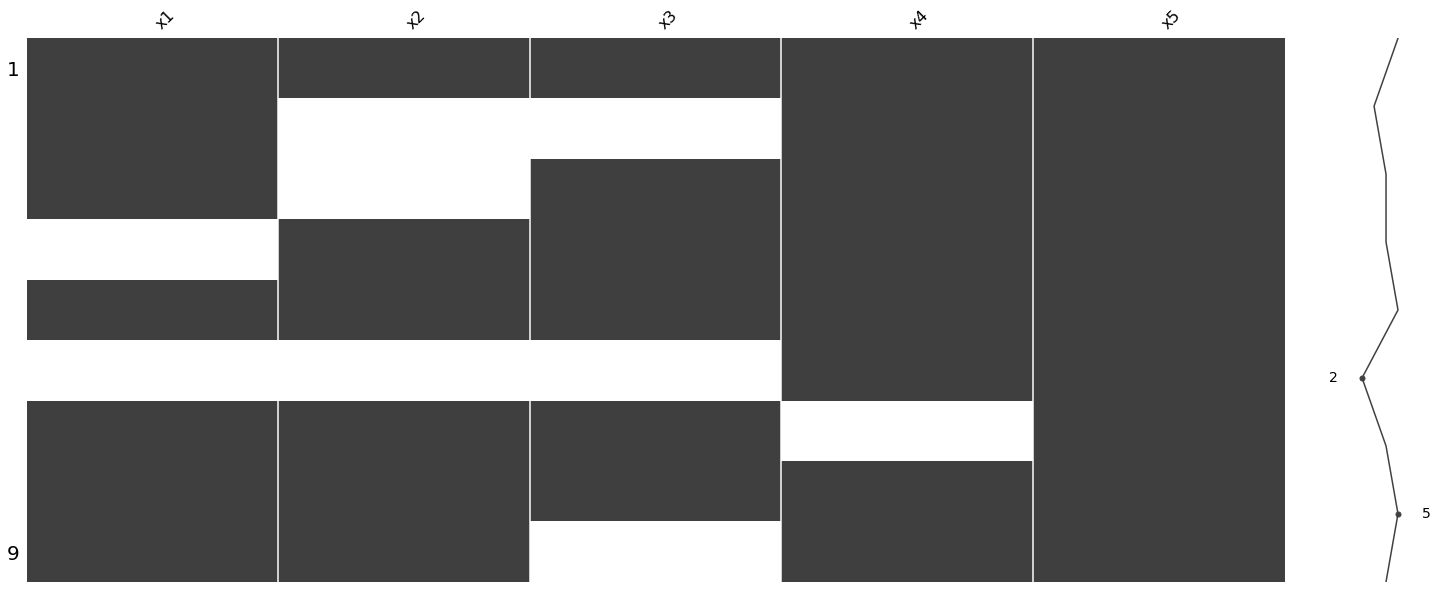

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import missingno as msno

# 결측 데이터를 시각화 함수
# 결측 데이터는 흰색, 그렇지 않은 데이터는 검은색
msno.matrix(df)
plt.show()

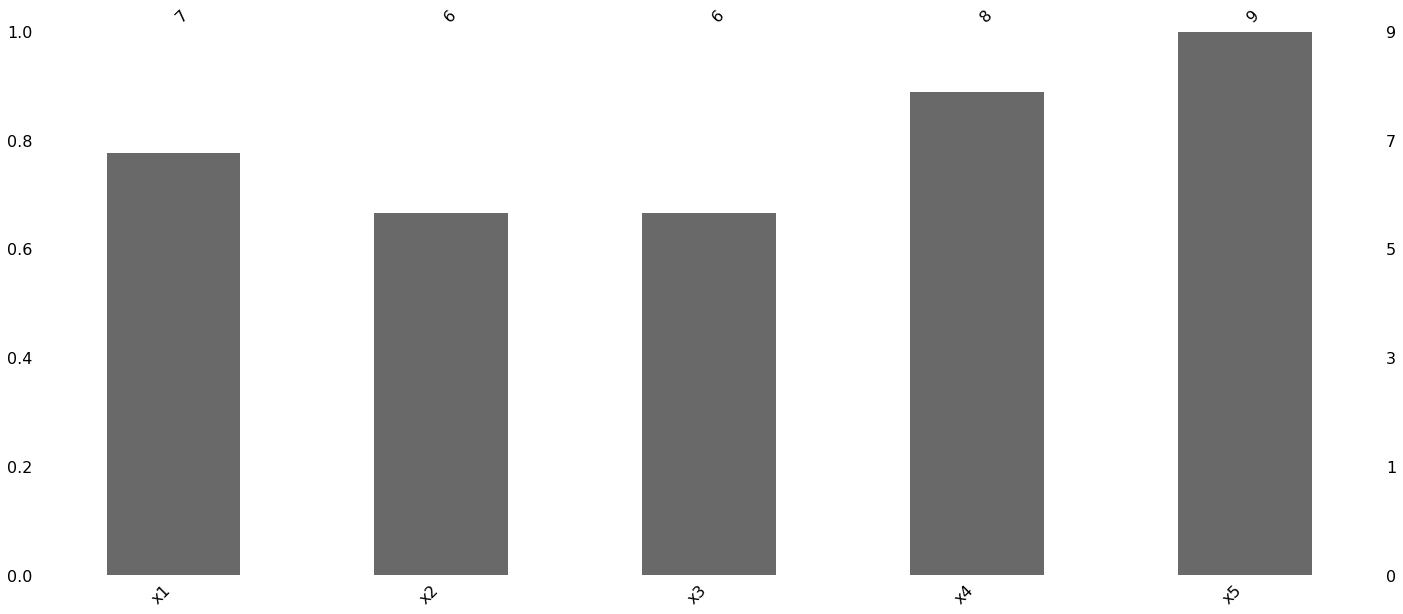

In [12]:
# 만약 갈 열에 결측 데이터가 얼마나 존재하는지 시각화하고 싶다면
msno.bar(df)
plt.show()

In [15]:
# 타이타닉 생존자 데이터를 이용한 missingno 쓰임새를 알아보자
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


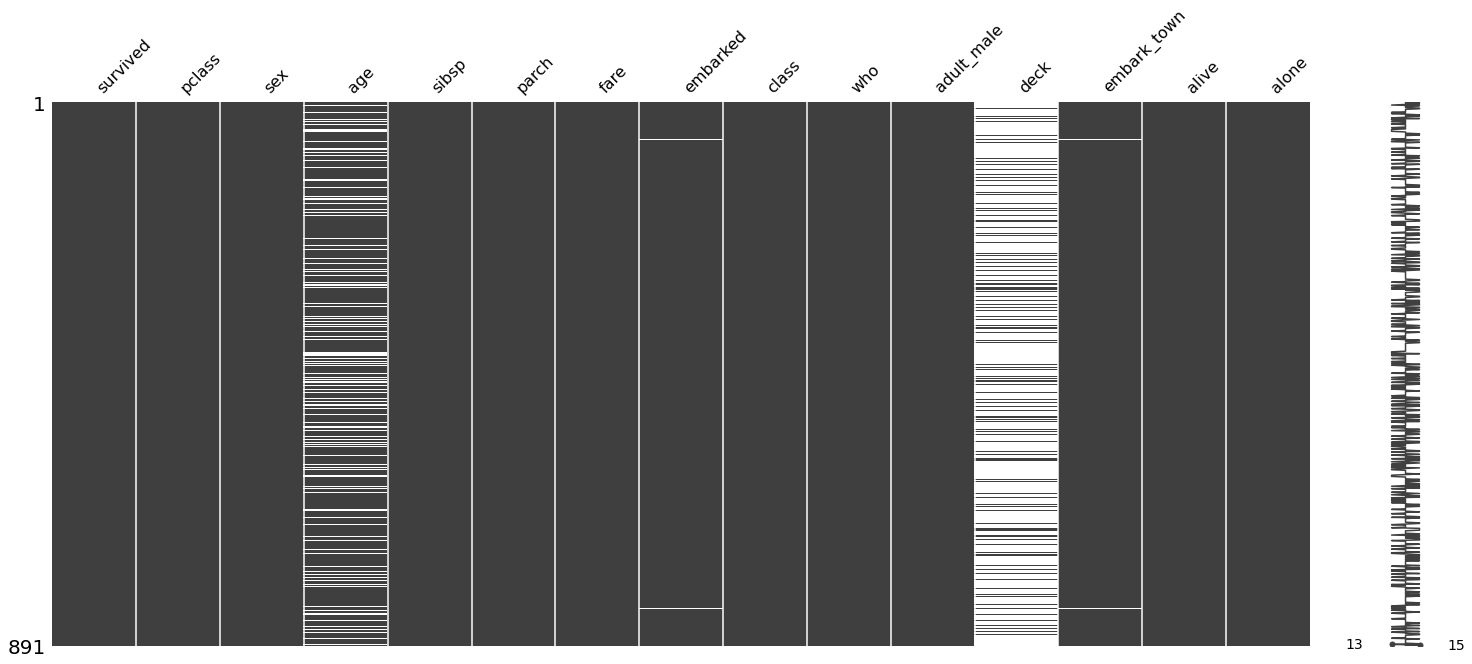

In [14]:
# missingno를 이용하여 타이타닉 데이터에서 age, deck, embarked, embark_town 열에 대한 결측 데이터 확인
msno.matrix(titanic)
plt.show()

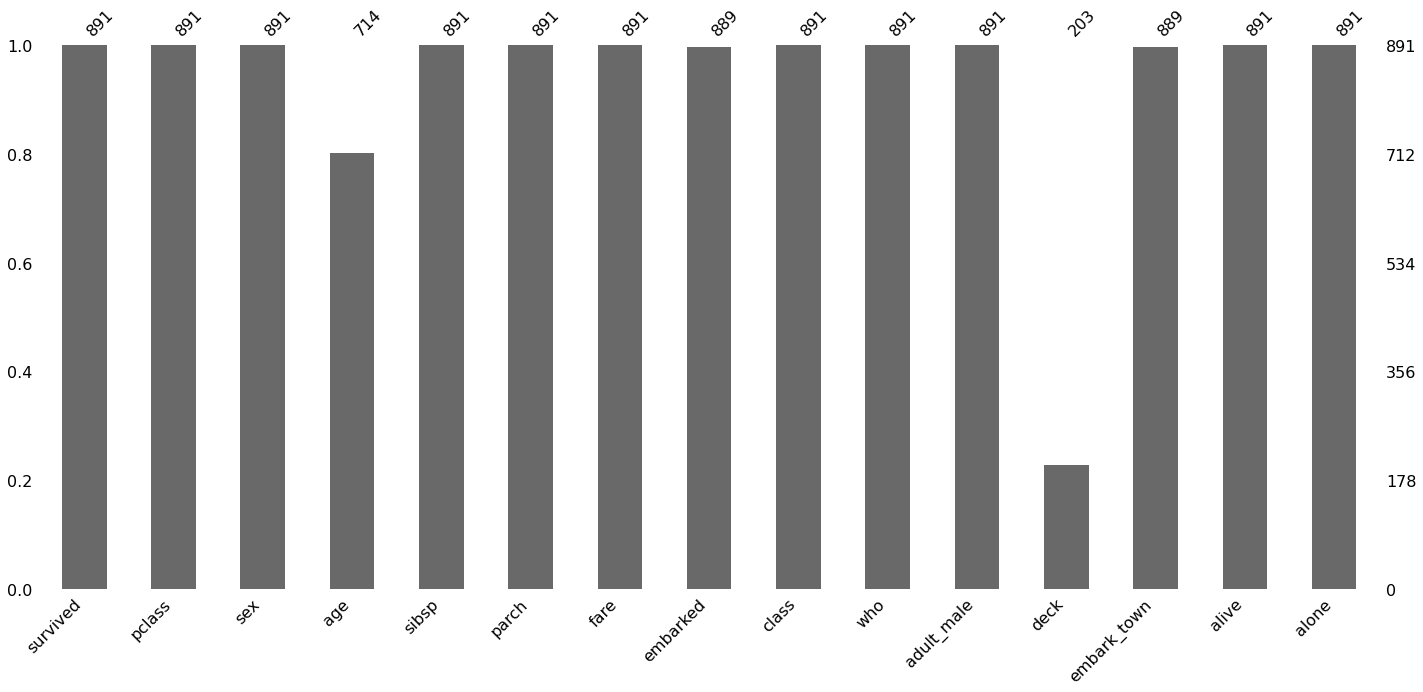

In [15]:
msno.bar(titanic)
plt.show()

# 결측된 데이터를 처리하는 방법
* 결측된 데이터가 너무 많은 경우 해당 데이터의 열 전체를 삭제
* 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체

In [16]:
# dropna()
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [17]:
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


In [18]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [19]:
# thresh 특정 개수 이상의 비결측 데이터가 있는 행 또는 열만 남긴다
df.dropna(thresh=7, axis=1) #열을 기준으로 비결측 데이터가 7개 이상인것만 냄기고 지움

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


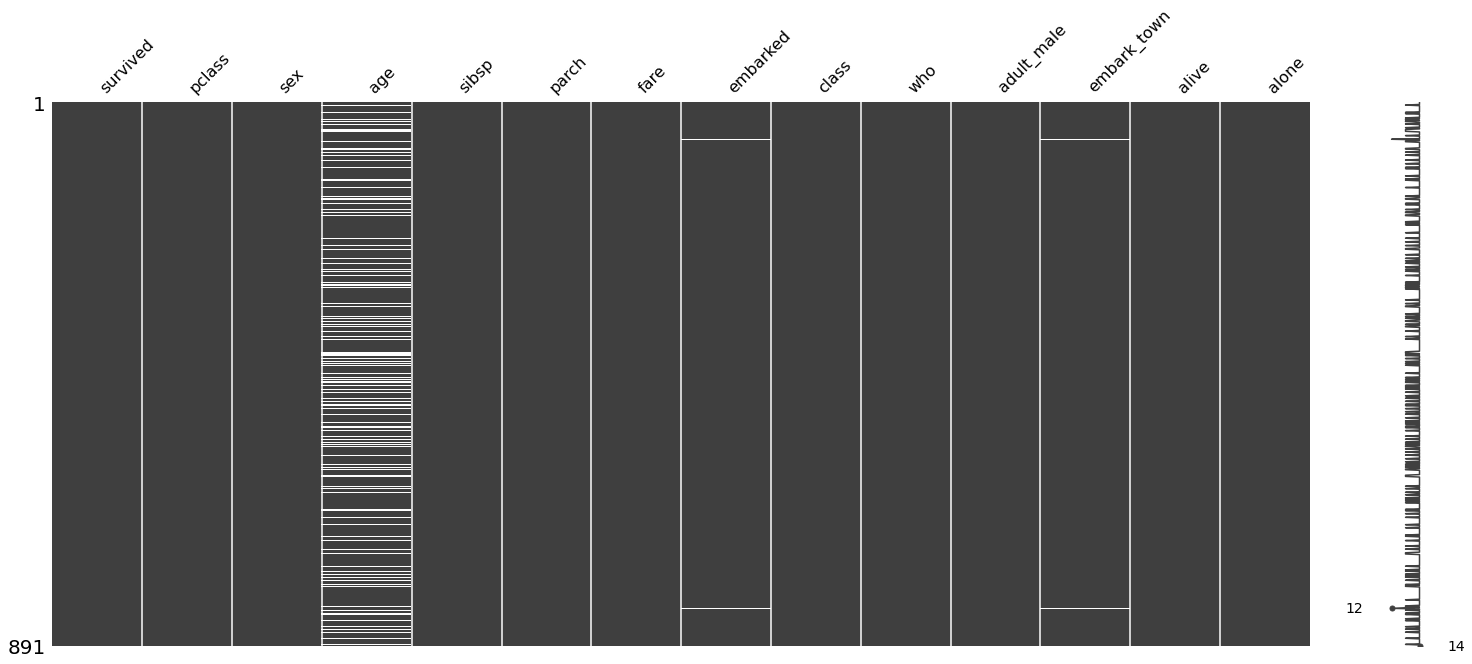

In [16]:
# deck 열을 삭제하고 싶다면?
titanic.dropna(thresh=int(len(titanic)*0.5), axis=1, inplace=True) # 타이타닉의 렝스의 절반도 안된 열을 삭제
msno.matrix(titanic)
plt.show()

In [21]:
# 결측 데이터를 대체하는 방법은?
# sklearn - SimpleImputer(평균, 중앙, 최빈)
# fit transform 대체값이 채워진 데이터 프레임을 생성할 수 있다.

In [17]:
# conda update --force conda
from sklearn.impute import SimpleImputer

In [18]:
# 버젼확인
import sklearn
print(sklearn.__version__)

0.23.1


In [19]:
# mean, median, most_frequent
imputer = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns= df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


C:\Users\i\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\i\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_

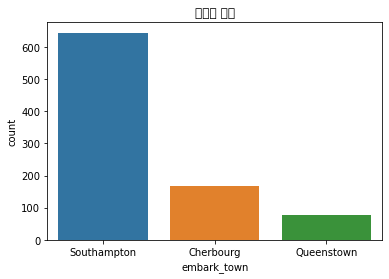

In [20]:
sns.countplot(titanic.embark_town)
plt.title('데이터 분포')
plt.show()

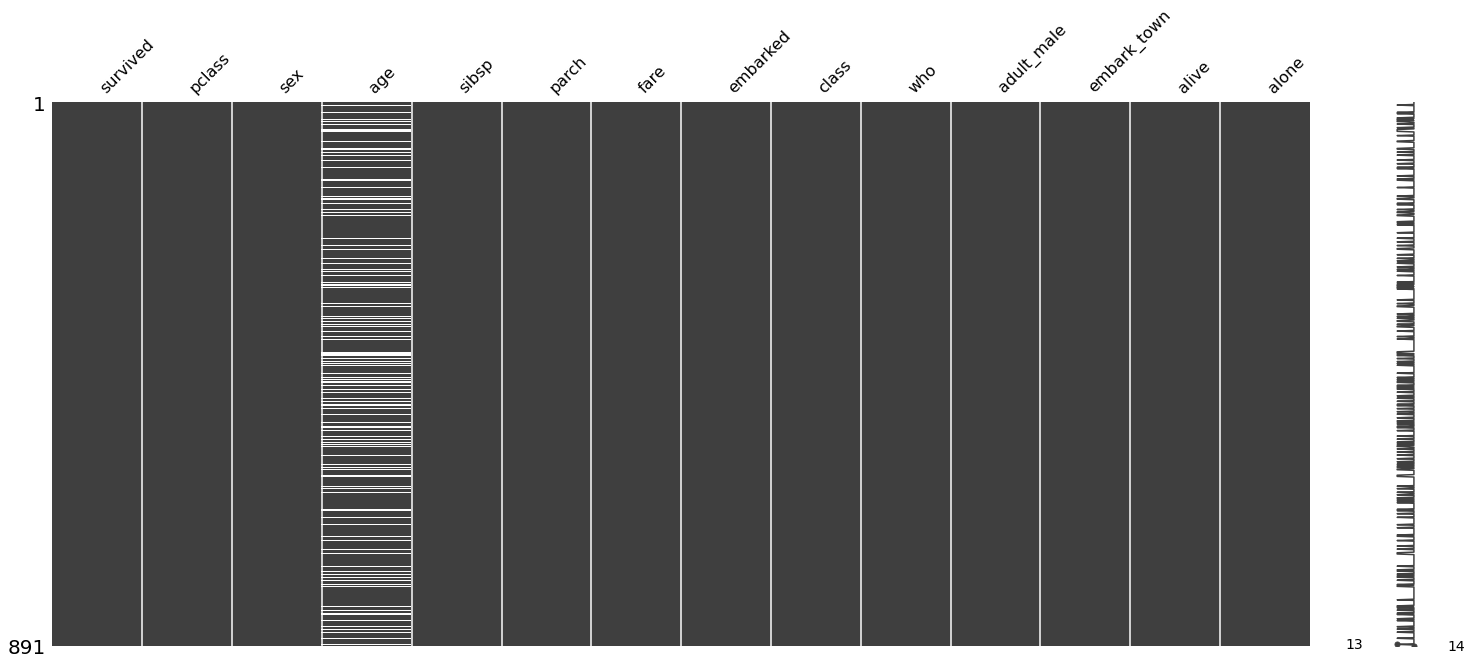

In [21]:
# mean, median, most_frequent
titanic_embark_town_imputer = SimpleImputer(strategy = 'most_frequent') 
titanic['embark_town'] = titanic_embark_town_imputer.fit_transform(titanic[['embark_town']]) #범주형이라서 최빈값으로 대체
titanic['embarked'] = titanic_embark_town_imputer.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

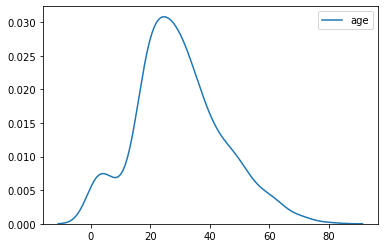

In [22]:
# 확인결과 age열만 결측값을 가지고 있고
# 수치형일 경우 데이터 분포 확인하고 어떻게 대체할것인지 고민?
sns.kdeplot(titanic.age)
plt.show()

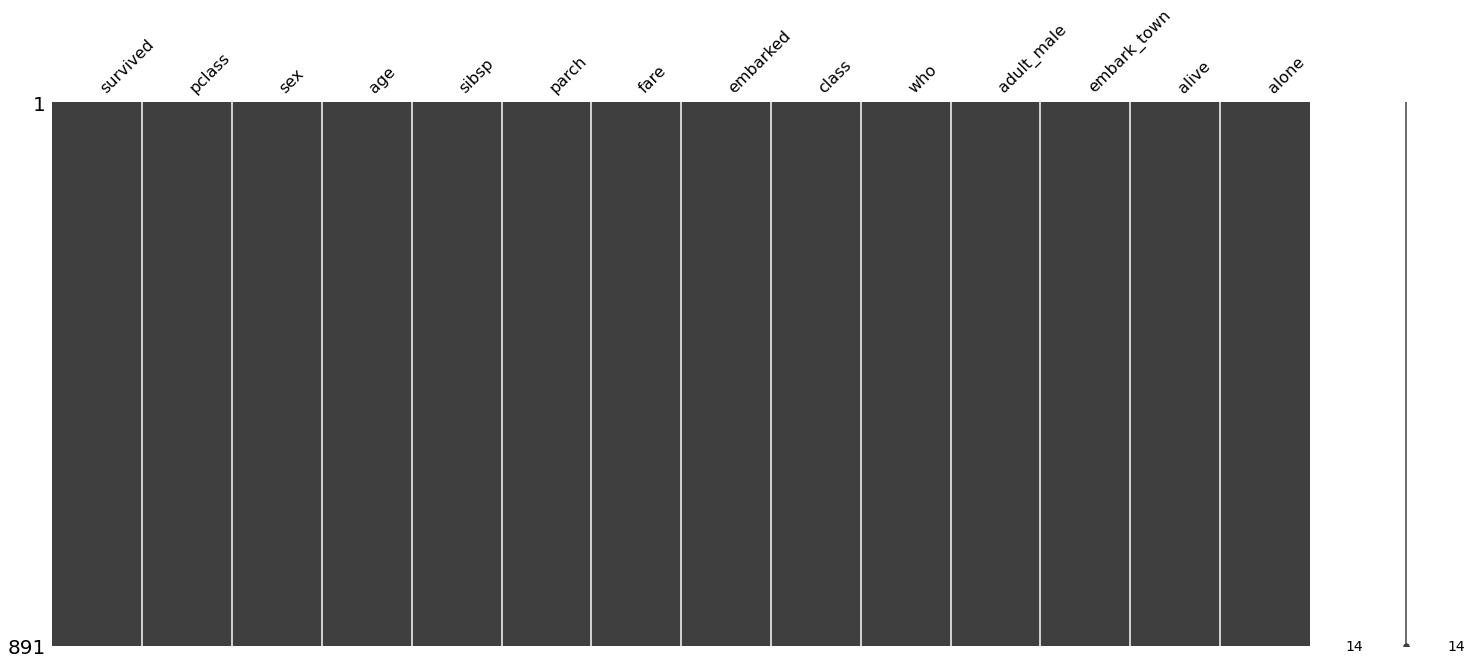

In [24]:
# mean, median, most_frequent
titanic_age_imputer = SimpleImputer(strategy = 'median') # 수치형이라 중위값으로 대체
titanic['age'] = titanic_age_imputer.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

# feature scailing
* Rawdata를 전처리

* Normalization(정규화) : 모든 featurer가 0과 1 사이의 값으로 변환(음수가 있으면 1)
* MinMaxScaler
*  데이터의 최소값 , 최대값 알 경우 사용한다
*  MinMaxScaler 공식) (X - X의 최소값) / (X의 최대값 - X의 최소값)

In [46]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [47]:
df['A']

0    14.00
1    90.20
2    90.95
3    96.27
4    91.21
Name: A, dtype: float64

In [48]:
(df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

* Standardization(표준화) : 변수의 범위를 정규분포(평균 0 , 편차 1) 변환
* StandardScaler
* 데이터의 최소, 최대값을 모를 경우 사용하면 된다
* Z-score 공식) (X - X 평균값) / (X 표준편차)

In [49]:
df['B'].mean() , df['B'].std()

(109.90799999999999, 4.901619120249964)

In [50]:
df['B'] = (df['B'] - df['B'].min()) / df['B'].std()
df['B']

0    0.000000
1    0.865020
2    1.495424
3    2.286999
4    2.378806
Name: B, dtype: float64

In [53]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

In [54]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [55]:
scaling_df = feature_scaling(df, column=['A','B'])
scaling_df

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


In [56]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

In [58]:
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [72]:
alcohol_df = feature_scaling(df, scaling_strategy="z-score",
                            column = ['Alcohol', 'Malic acid'])
alcohol_df

,Class label,Alcohol,Malic acid
0,1,1.514341,-0.560668
1,1,0.245597,-0.498009
2,1,0.196325,0.021172
3,1,1.686791,-0.345835
4,1,0.294868,0.227053
...,...,...,...
173,3,0.873810,2.966176
174,3,0.491955,1.408636
175,3,0.331822,1.739837
176,3,0.208643,0.227053


* sklearn feature scaling
* fit(규칙생성), transform(규칙적용)의 과정을 거친다
* fit_transform()

In [59]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )
df.columns = ['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


* Standardization
* MinMaxScaler

In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
dt_std = std_scaler.fit( df[['Alcohol', 'Malic acid']] ).transform( df[['Alcohol','Malic acid']] )

print(dt_std[ : 5])
print("*" * 50)

minmax_scaler = MinMaxScaler()
dt_mm = minmax_scaler.fit( df[['Alcohol', 'Malic acid']] ).transform( df[['Alcohol','Malic acid']] )

print(dt_std[ : 5])


[[ 1.51861254 -0.5622498 ]
 [ 0.24628963 -0.49941338]
 [ 0.19687903  0.02123125]
 [ 1.69154964 -0.34681064]
 [ 0.29570023  0.22769377]]
**************************************************
[[ 1.51861254 -0.5622498 ]
 [ 0.24628963 -0.49941338]
 [ 0.19687903  0.02123125]
 [ 1.69154964 -0.34681064]
 [ 0.29570023  0.22769377]]


In [65]:
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [66]:
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [67]:
test_array

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [69]:
scaler = MinMaxScaler()
train_scaler = scaler.fit(train_array).transform(train_array)
print('raw  data : ', np.round(train_array.reshape(-1), 2))
print('scaler data : ', np.round(train_scaler.reshape(-1), 2))

raw  data :  [ 0  1  2  3  4  5  6  7  8  9 10]
scaler data :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [73]:
# 문제점 확인
test_scaler = scaler.fit(test_array).transform(test_array)
print('test data : ', np.round(test_array.reshape(-1),2))
print('scaler data : ', np.round(test_scaler.reshape(-1),2))  #test데이터는 별도로 스케일링하면 안되고 train데이터에서 스케일링해놓고 트랜스폼만 처리

test data :  [0 1 2 3 4 5]
scaler data :  [0.  0.2 0.4 0.6 0.8 1. ]


* iris데이터 세트를 이용한 피처 스케일링

In [75]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print(iris_df.head())

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [77]:
# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64
feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
